# Preprocessing Data

In [6]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

from jupyterthemes import jtplot
jtplot.style(theme='grade3')

In [2]:
df = pd.read_csv('../data/data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
Name               16717 non-null object
Platform           16719 non-null object
Year_of_Release    16450 non-null float64
Genre              16717 non-null object
Publisher          16665 non-null object
NA_Sales           16719 non-null float64
EU_Sales           16719 non-null float64
JP_Sales           16719 non-null float64
Other_Sales        16719 non-null float64
Global_Sales       16719 non-null float64
Critic_Score       8137 non-null float64
Critic_Count       8137 non-null float64
User_Score         10015 non-null object
User_Count         7590 non-null float64
Developer          10096 non-null object
Rating             9950 non-null object
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


# platform and game released

In [3]:
df['Platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

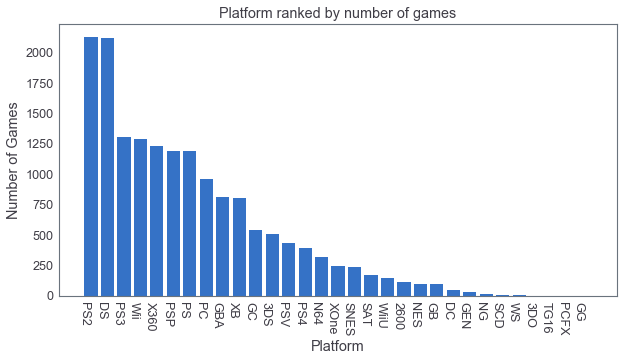

In [142]:
plt.figure(figsize=(10,5))
plat_counts = df.groupby(['Platform']).size().reset_index(name='counts').sort_values(by='counts', ascending=False).values
plt.bar(range(len(plat_counts)), plat_counts[:,1], align='edge')
plt.grid(False)
plt.title('Platform ranked by number of games')
plt.xlabel('Platform')
plt.ylabel('Number of Games')
plt.xticks(range(len(plat_counts)), plat_counts[:,0], rotation=-90)
plt.savefig('../plot/games_platform.pdf', bbox_inches='tight')

In [56]:
df.dropna(subset=['Year_of_Release'], inplace=True)
consoles = ['PS3', 'PS4', 'X360', 'XOne', 'Wii', 'WiiU']
years = range(2004,2018)
hist_consoles_games = []
for console in consoles:
    hist_consoles_games.append(np.histogram(df[(df['Platform']==console)]['Year_of_Release'], years)[0])

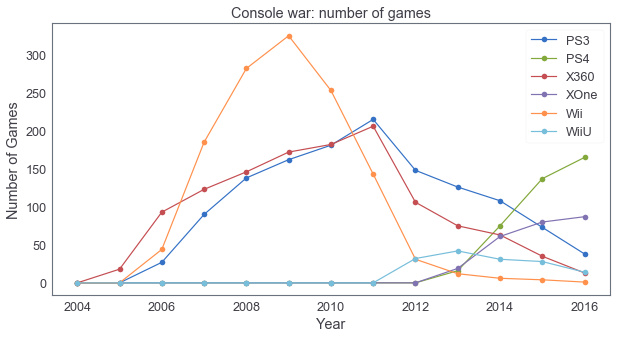

In [143]:
plt.figure(figsize=(10,5))
for i in range(len(consoles)):
    plt.plot(years[:-1],hist_consoles_games[i], 'o-', label=consoles[i])
plt.grid(False)
plt.title('Console war: number of games')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.legend()
plt.savefig('../plot/console_games_year.pdf', bbox_inches='tight')

# platform and game sales

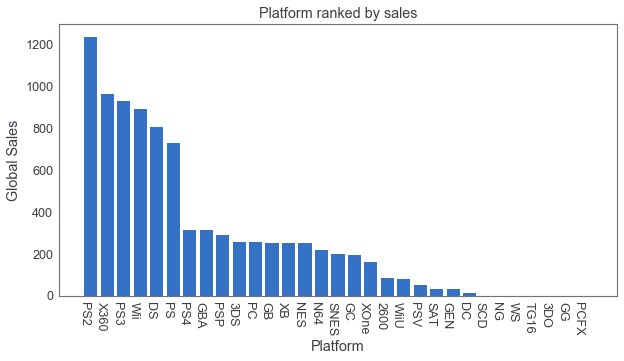

In [144]:
plt.figure(figsize=(10,5))
plat_sales = df[['Platform', 'Global_Sales']].groupby(['Platform']).sum().reset_index().sort_values(by='Global_Sales', ascending=False).values
plt.bar(range(len(plat_counts)), plat_sales[:,1], align='edge')
plt.grid(False)
plt.title('Platform ranked by sales')
plt.xlabel('Platform')
plt.ylabel('Global Sales')
plt.xticks(range(len(plat_sales)), plat_sales[:,0], rotation=-90)
plt.savefig('../plot/sales_platform.pdf', bbox_inches='tight')

In [71]:
hist_consoles_sales = []
df_sales_plat_year = df[['Platform', 'Year_of_Release', 'Global_Sales']].groupby(['Platform', 'Year_of_Release'], as_index=False).sum()
for console in consoles:
    sales_years = []
    for year in years:
        sale = df_sales_plat_year[(df_sales_plat_year['Platform']==console) & 
            (df_sales_plat_year['Year_of_Release']==year)]['Global_Sales'].values
        if sale:
            sales_years.append(sale[0])
        else:
            sales_years.append(0)
    hist_consoles_sales.append(sales_years)

/usr/local/Cellar/python3/3.6.0/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:8: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  


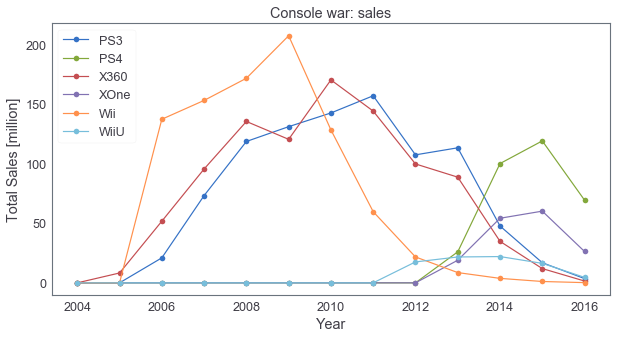

In [145]:
plt.figure(figsize=(10,5))
for i in range(len(consoles)):
    plt.plot(years[:-1],hist_consoles_sales[i][:-1], 'o-', label=consoles[i])
plt.grid(False)
plt.title('Console war: sales')
plt.xlabel('Year')
plt.ylabel('Total Sales [million]')
plt.legend()
plt.savefig('../plot/console_sales_year.pdf', bbox_inches='tight')

# platform and sales per game

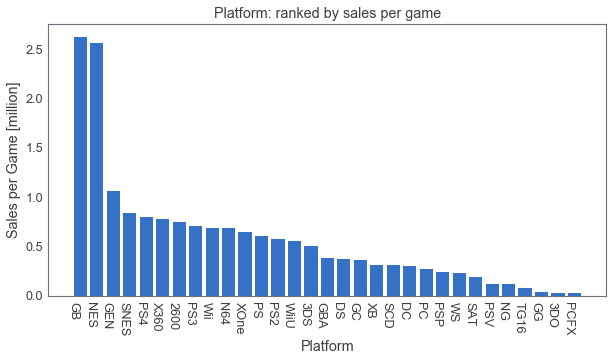

In [146]:
df_plat = df[['Platform', 'Year_of_Release', 'Global_Sales']].groupby(['Platform']).agg({'Year_of_Release':['count'], 'Global_Sales': ['sum']}).reset_index()
df_plat['Sales_per_Game'] = df_plat['Global_Sales'].values / df_plat['Year_of_Release'].values
plat_ratio = df_plat[['Platform', 'Sales_per_Game']].sort_values(by='Sales_per_Game', ascending=False).values
plt.figure(figsize=(10,5))
plt.bar(range(len(plat_ratio)), plat_ratio[:,1], align='edge')
plt.grid(False)
plt.title('Platform: ranked by sales per game')
plt.xlabel('Platform')
plt.ylabel('Sales per Game [million]')
plt.xticks(range(len(plat_ratio)), plat_ratio[:,0], rotation=-90)
plt.savefig('../plot/salesPerGame_platform.pdf', bbox_inches='tight')

# Year: total games, total sales, sales per game

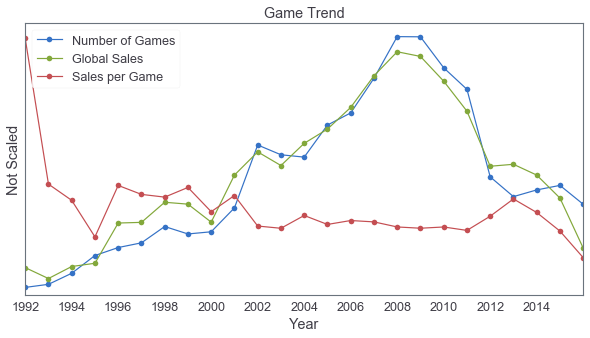

In [151]:
df_year = df[['Year_of_Release', 'Platform', 'Global_Sales']].groupby(['Year_of_Release']).\
    agg({'Platform': ['count'], 'Global_Sales': ['sum']}).reset_index()
df_year['Sales_per_Game'] = df_year['Global_Sales'].values / df_year['Platform'].values
year_stat = df_year.values
plt.figure(figsize=(10,5))
plt.plot(year_stat[:,0], year_stat[:,1], 'o-', label='Number of Games')
plt.plot(year_stat[:,0], year_stat[:,2]*2, 'o-', label='Global Sales')
plt.plot(year_stat[:,0], year_stat[:,3]*800, 'o-', label='Sales per Game')
plt.grid(False)
plt.title('Game Trend')
plt.xlim([1992,2016])
plt.ylim([0,1500])
plt.xlabel('Year')
plt.ylabel('Not Scaled')
plt.xticks(range(1992,2016,2),range(1992,2016,2))
plt.tick_params(axis='y', which='both', left=False, labelleft='off')
plt.legend(loc=2)
plt.savefig('../plot/status_year.pdf', bbox_inches='tight')

# Genre and number of games

In [150]:
df['Genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

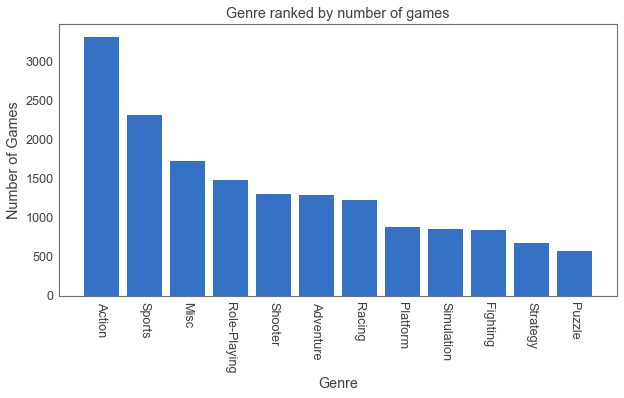

In [160]:
df.dropna(subset=['Genre'], inplace=True)
hist_genre = df.groupby(['Genre']).size().reset_index(name='counts').sort_values(by='counts', ascending=False).values
plt.figure(figsize=(10,5))
plt.bar(range(len(hist_genre)), hist_genre[:,1], align='center')
plt.grid(False)
plt.title('Genre ranked by number of games')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.xticks(range(len(hist_genre)), hist_genre[:,0], rotation=-90)
plt.savefig('../plot/games_genre.pdf', bbox_inches='tight')

# Genre and sales

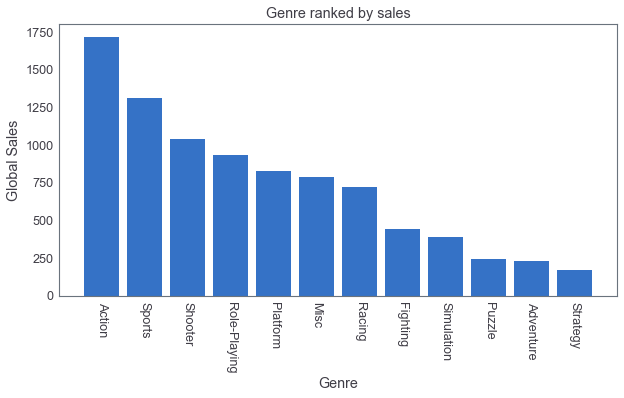

In [162]:
plt.figure(figsize=(10,5))
genre_sales = df[['Genre', 'Global_Sales']].groupby(['Genre']).sum().reset_index().sort_values(by='Global_Sales', ascending=False).values
plt.bar(range(len(plat_counts)), genre_sales[:,1], align='center')
plt.grid(False)
plt.title('Genre ranked by sales')
plt.xlabel('Genre')
plt.ylabel('Global Sales')
plt.xticks(range(len(genre_sales)), genre_sales[:,0], rotation=-90)
plt.savefig('../plot/sales_genre.pdf', bbox_inches='tight')

# Final genre plot

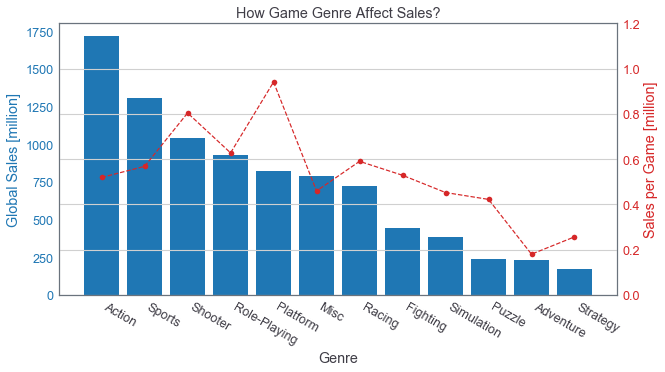

In [362]:
df_genre = df[['Genre', 'Platform', 'Global_Sales']].groupby(['Genre'])\
    .agg({'Platform': ['count'], 'Global_Sales': ['sum']}).reset_index()
df_genre['Sales_per_Game'] = df_genre['Global_Sales'].values / df_genre['Platform'].values
table_genre = df_genre.sort_values(by=df_genre.columns[2], ascending=False).values
#plt.figure(figsize=(10,5))
#plt.bar(range(len(table_genre)), table_genre[:,2])
#plt.plot(range(len(table_genre)), table_genre[:,3]*1500, 'ro--')
#plt.grid(False)
#plt.title('How Genre Affect Sales?')
#plt.xlabel('Genre')
#plt.ylabel('Global Sales')
#plt.xticks(range(len(genre_sales)), genre_sales[:,0], rotation=-90)
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(1,1,1)
ax1.grid(False)
ax1.set_title('How Game Genre Affect Sales?')
ax1.set_xticks(range(len(genre_sales)))
ax1.set_xticklabels(genre_sales[:,0], rotation=-30, ha='left')
#ax1.xaxis.set_tick_params(rotation=-45)
ax1.set_xlabel('Genre')
ax1.set_ylabel('Global Sales [million]', color='tab:blue')
ax1.bar(range(len(table_genre)), table_genre[:,2], color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax2 = ax1.twinx()
#ax2.grid(False)
ax2.set_ylabel('Sales per Game [million]', color='tab:red')  # we already handled the x-label with ax1
ax2.plot(range(len(table_genre)), table_genre[:,3], 'o--', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.set_ylim([0,1.2])
fig.savefig('../plot/final_genre.pdf', bbox_inches='tight')

# Genre and sales per game

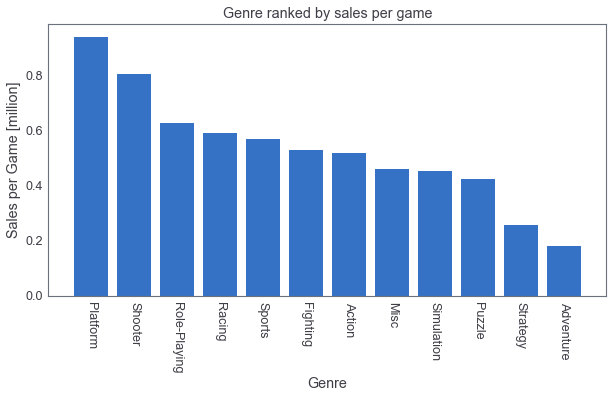

In [363]:
df_genre = df[['Genre', 'Year_of_Release', 'Global_Sales']].groupby(['Genre']).agg({'Year_of_Release':['count'], 'Global_Sales': ['sum']}).reset_index()
df_genre['Sales_per_Game'] = df_genre['Global_Sales'].values / df_genre['Year_of_Release'].values
genre_ratio = df_genre[['Genre', 'Sales_per_Game']].sort_values(by='Sales_per_Game', ascending=False).values
plt.figure(figsize=(10,5))
plt.bar(range(len(genre_ratio)), genre_ratio[:,1], align='center')
plt.grid(False)
plt.title('Genre ranked by sales per game')
plt.xlabel('Genre')
plt.ylabel('Sales per Game [million]')
plt.xticks(range(len(genre_ratio)), genre_ratio[:,0], rotation=-90)
plt.savefig('../plot/salesPerGame_genre.pdf', bbox_inches='tight')

# Final year and genre

In [364]:
df_genre = df[['Genre', 'Year_of_Release', 'Platform', 'Global_Sales']].groupby(['Genre', 'Year_of_Release'])\
    .agg({'Platform': ['count'], 'Global_Sales': ['sum']}).reset_index()
df_genre['Sales_per_Game'] = df_genre['Global_Sales'].values / df_genre['Platform'].values

In [365]:
genres = ['Action', 'Sports', 'Shooter', 'Role-Playing', 'Platform', 'Racing']
          #'Fighting', 'Simulation', 'Puzzle', 'Advanture', 'Strategy']
years = range(1992,2017)
hist_genre_year = []
for genre in genres:
    hist_genre = []
    for year in years:
        tmp = df_genre[(df_genre['Genre']==genre) & (df_genre['Year_of_Release']==year)][df_genre.columns[2:5]].values
        if len(tmp)!=0:
            hist_genre.append(tmp.flatten())
        else:
            hist_genre.append([0,0,0])
    hist_genre_year.append(hist_genre)

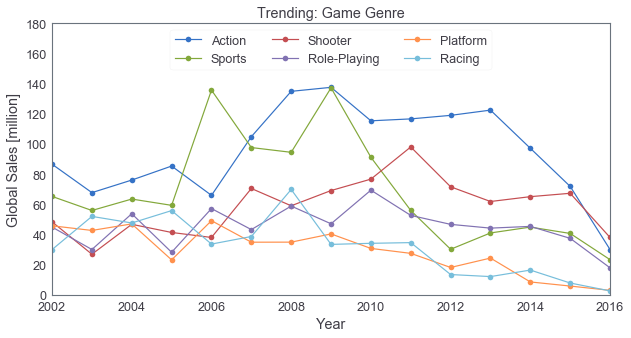

In [366]:
plt.figure(figsize=(10,5))
for i in range(len(genres)):
    plt.plot(years, np.array(hist_genre_year[i])[:,1], 'o-', label=genres[i])
plt.grid(False)
plt.title('Trending: Game Genre')
plt.xlim([2002,2016])
plt.ylim([0,180])
plt.xlabel('Year')
plt.ylabel('Global Sales [million]')
plt.xticks(range(2002,2017,2),range(2002,2017,2))
plt.legend(loc=9, ncol=3)
plt.savefig('../plot/final_sales_genre_year.pdf', bbox_inches='tight')

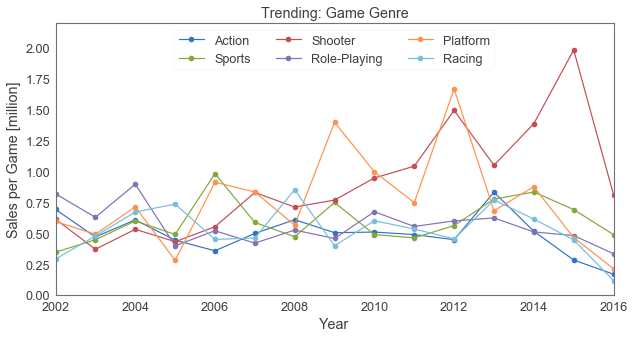

In [367]:
plt.figure(figsize=(10,5))
for i in range(len(genres)):
    plt.plot(years, np.array(hist_genre_year[i])[:,2], 'o-', label=genres[i])
plt.grid(False)
plt.title('Trending: Game Genre')
plt.xlim([2002,2016])
plt.ylim([0,2.2])
plt.xlabel('Year')
plt.ylabel('Sales per Game [million]')
plt.xticks(range(2002,2017,2),range(2002,2017,2))
plt.legend(loc=9, ncol=3)
plt.savefig('../plot/final_salesPerGame_genre_year.pdf', bbox_inches='tight')

# Final rating

In [368]:
df['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Text(0,0.5,'Number of Games')

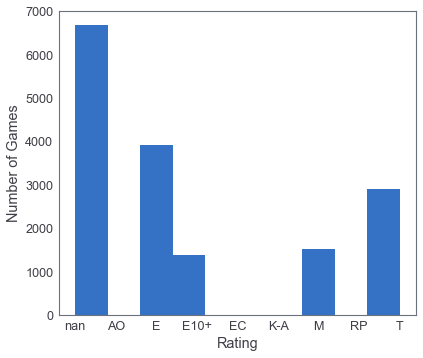

In [369]:
plt.hist(df['Rating'])
plt.grid(False)
plt.xlabel('Rating')
plt.ylabel('Number of Games')

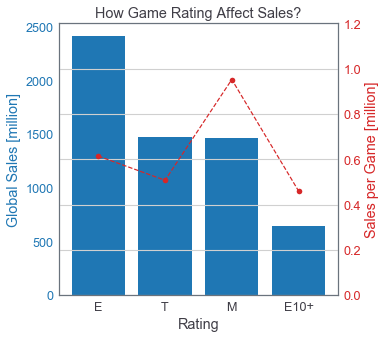

In [370]:
df_rate = df.dropna(subset=['Rating'])
df_rate = df[['Rating', 'Platform', 'Global_Sales']].groupby(['Rating'])\
    .agg({'Platform': ['count'], 'Global_Sales': ['sum']}).reset_index()
df_rate['Sales_per_Game'] = df_rate['Global_Sales'].values / df_rate['Platform'].values
table_rate = df_rate.sort_values(by=df_rate.columns[2], ascending=False).values
table_rate = table_rate[:4]
fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(1,1,1)
ax1.grid(False)
ax1.set_title('How Game Rating Affect Sales?')
ax1.set_xticks(range(len(table_rate)))
ax1.set_xticklabels(table_rate[:,0], rotation=0, ha='center')
#ax1.xaxis.set_tick_params(rotation=-45)
ax1.set_xlabel('Rating')
ax1.set_ylabel('Global Sales [million]', color='tab:blue')
ax1.bar(range(len(table_rate)), table_rate[:,2], color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax2 = ax1.twinx()
#ax2.grid(False)
ax2.set_ylabel('Sales per Game [million]', color='tab:red')  # we already handled the x-label with ax1
ax2.plot(range(len(table_rate)), table_rate[:,3], 'o--', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.set_ylim([0,1.2])
fig.savefig('../plot/final_rating.pdf', bbox_inches='tight')

In [371]:
df_rate = df[['Rating', 'Year_of_Release', 'Platform', 'Global_Sales']].groupby(['Rating', 'Year_of_Release'])\
    .agg({'Platform': ['count'], 'Global_Sales': ['sum']}).reset_index()
df_rate['Sales_per_Game'] = df_rate['Global_Sales'].values / df_rate['Platform'].values

In [372]:
rates = ['E', 'E10+', 'T', 'M']
years = range(2002,2017)
hist_rate_year = []
for rate in rates:
    hist_rate = []
    for year in years:
        tmp = df_rate[(df_rate['Rating']==rate) & (df_rate['Year_of_Release']==year)][df_rate.columns[2:5]].values
        if len(tmp)!=0:
            hist_rate.append(tmp.flatten())
        else:
            hist_rate.append([0,0,0])
    hist_rate_year.append(hist_rate)

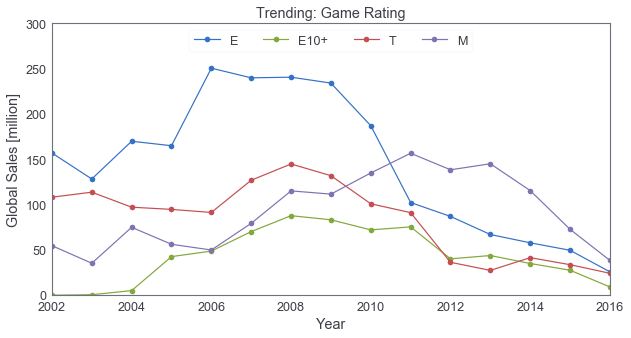

In [373]:
plt.figure(figsize=(10,5))
for i in range(len(rates)):
    plt.plot(years, np.array(hist_rate_year[i])[:,1], 'o-', label=rates[i])
plt.grid(False)
plt.title('Trending: Game Rating')
plt.xlim([2002,2016])
plt.ylim([0,300])
plt.xlabel('Year')
plt.ylabel('Global Sales [million]')
plt.xticks(range(2002,2017,2),range(2002,2017,2))
plt.legend(loc=9, ncol=4)
plt.savefig('../plot/final_sales_rate_year.pdf', bbox_inches='tight')

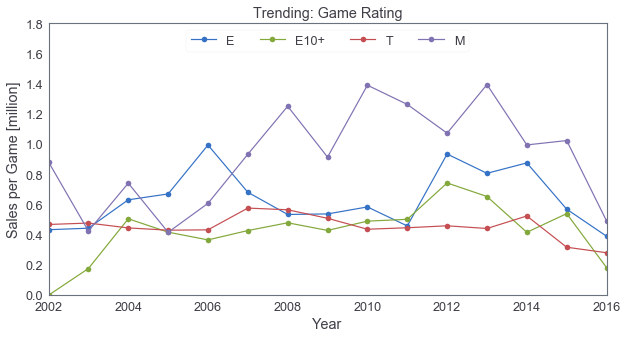

In [374]:
plt.figure(figsize=(10,5))
for i in range(len(rates)):
    plt.plot(years, np.array(hist_rate_year[i])[:,2], 'o-', label=rates[i])
plt.grid(False)
plt.title('Trending: Game Rating')
plt.xlim([2002,2016])
plt.ylim([0,1.8])
plt.xlabel('Year')
plt.ylabel('Sales per Game [million]')
plt.xticks(range(2002,2017,2),range(2002,2017,2))
plt.legend(loc=9, ncol=4)
plt.savefig('../plot/final_salesPerGame_rate_year.pdf', bbox_inches='tight')

# Final regional sales

In [393]:
corr_matrix = df[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].corr().values
corr_matrix

array([[1.        , 0.76654807, 0.45116621, 0.63848408],
       [0.76654807, 1.        , 0.43590167, 0.72268321],
       [0.45116621, 0.43590167, 1.        , 0.29156951],
       [0.63848408, 0.72268321, 0.29156951, 1.        ]])

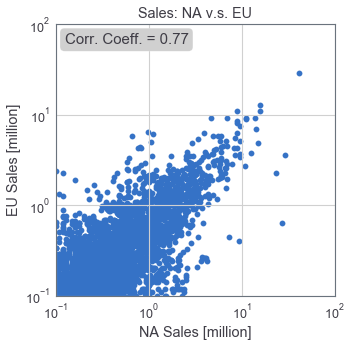

In [408]:
plt.figure(figsize=(5,5))
plt.scatter(df['NA_Sales'], df['EU_Sales'])
plt.title('Sales: NA v.s. EU')
plt.xlabel('NA Sales [million]')
plt.ylabel('EU Sales [million]')
plt.xlim([1e-1,1e2])
plt.ylim([1e-1,1e2])
plt.xscale('log')
plt.yscale('log')
plt.text(1.25e-1, 0.8e2, "Corr. Coeff. = {:.2f}".format(corr_matrix[0][1]), size=15, rotation=0.,ha="left", va="top",bbox=dict(boxstyle="round",))
plt.savefig('../plot/final_sales_NA_EU.pdf')

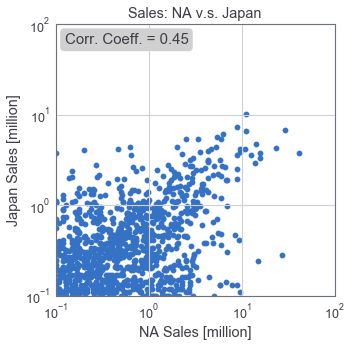

In [407]:
plt.figure(figsize=(5,5))
plt.scatter(df['NA_Sales'], df['JP_Sales'])
plt.title('Sales: NA v.s. Japan')
plt.xlabel('NA Sales [million]')
plt.ylabel('Japan Sales [million]')
plt.xlim([1e-1,1e2])
plt.ylim([1e-1,1e2])
plt.xscale('log')
plt.yscale('log')
plt.text(1.25e-1, 0.8e2, "Corr. Coeff. = {:.2f}".format(corr_matrix[0][2]), size=15, rotation=0.,ha="left", va="top",bbox=dict(boxstyle="round",))
plt.savefig('../plot/final_sales_NA_JP.pdf')

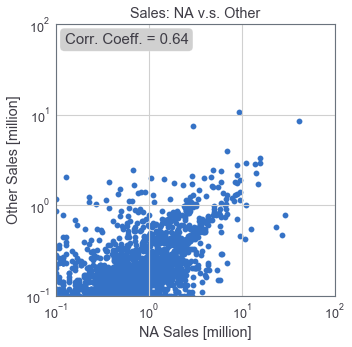

In [410]:
plt.figure(figsize=(5,5))
plt.scatter(df['NA_Sales'], df['Other_Sales'])
plt.title('Sales: NA v.s. Other')
plt.xlabel('NA Sales [million]')
plt.ylabel('Other Sales [million]')
plt.xlim([1e-1,1e2])
plt.ylim([1e-1,1e2])
plt.xscale('log')
plt.yscale('log')
plt.text(1.25e-1, 0.8e2, "Corr. Coeff. = {:.2f}".format(corr_matrix[0][3]), size=15, rotation=0.,ha="left", va="top",bbox=dict(boxstyle="round",))
plt.savefig('../plot/final_sales_NA_Other.pdf')

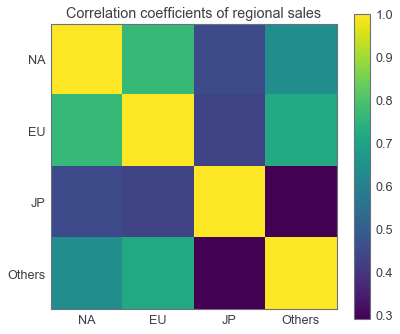

In [375]:
regions = ['NA', 'EU', 'JP', 'Others']
regions_df = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
plt.imshow(df[regions_df].corr())
plt.title('Correlation coefficients of regional sales')
plt.grid(False)
plt.xticks(range(0,4), regions)
plt.yticks(range(0,4), regions)
plt.colorbar()

In [411]:
df_region = df.dropna(subset=['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'])['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', '']
df_region.info()
"""df_region = df[['Rating', 'Platform', 'Global_Sales']].groupby(['Rating'])\
    .agg({'Platform': ['count'], 'Global_Sales': ['sum']}).reset_index()
df_region['Sales_per_Game'] = df_region['Global_Sales'].values / df_region['Platform'].values
table_region = df_region.sort_values(by=df_region.columns[2], ascending=False).values
table_region = table_region[:4]"""
"""fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(1,1,1)
ax1.grid(False)
ax1.set_title('How Game Rating Affect Sales?')
ax1.set_xticks(range(len(table_region)))
ax1.set_xticklabels(table_region[:,0], rotation=0, ha='center')
#ax1.xaxis.set_tick_params(rotation=-45)
ax1.set_xlabel('Rating')
ax1.set_ylabel('Global Sales [million]', color='tab:blue')
ax1.bar(range(len(table_region)), table_region[:,2], color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')
ax2 = ax1.twinx()
#ax2.grid(False)
ax2.set_ylabel('Sales per Game [million]', color='tab:red')  # we already handled the x-label with ax1
ax2.plot(range(len(table_region)), table_region[:,3], 'o--', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')
ax2.set_ylim([0,1.2])
fig.savefig('../plot/final_rating.pdf', bbox_inches='tight')"""

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16448 entries, 0 to 16718
Data columns (total 16 columns):
Name               16448 non-null object
Platform           16448 non-null object
Year_of_Release    16448 non-null float64
Genre              16448 non-null object
Publisher          16416 non-null object
NA_Sales           16448 non-null float64
EU_Sales           16448 non-null float64
JP_Sales           16448 non-null float64
Other_Sales        16448 non-null float64
Global_Sales       16448 non-null float64
Critic_Score       7983 non-null float64
Critic_Count       7983 non-null float64
User_Score         9840 non-null object
User_Count         7463 non-null float64
Developer          9907 non-null object
Rating             9769 non-null object
dtypes: float64(9), object(7)
memory usage: 2.1+ MB


"fig = plt.figure(figsize=(5,5))\nax1 = fig.add_subplot(1,1,1)\nax1.grid(False)\nax1.set_title('How Game Rating Affect Sales?')\nax1.set_xticks(range(len(table_region)))\nax1.set_xticklabels(table_region[:,0], rotation=0, ha='center')\n#ax1.xaxis.set_tick_params(rotation=-45)\nax1.set_xlabel('Rating')\nax1.set_ylabel('Global Sales [million]', color='tab:blue')\nax1.bar(range(len(table_region)), table_region[:,2], color='tab:blue')\nax1.tick_params(axis='y', labelcolor='tab:blue')\nax2 = ax1.twinx()\n#ax2.grid(False)\nax2.set_ylabel('Sales per Game [million]', color='tab:red')  # we already handled the x-label with ax1\nax2.plot(range(len(table_region)), table_region[:,3], 'o--', color='tab:red')\nax2.tick_params(axis='y', labelcolor='tab:red')\nax2.set_ylim([0,1.2])\nfig.savefig('../plot/final_rating.pdf', bbox_inches='tight')"

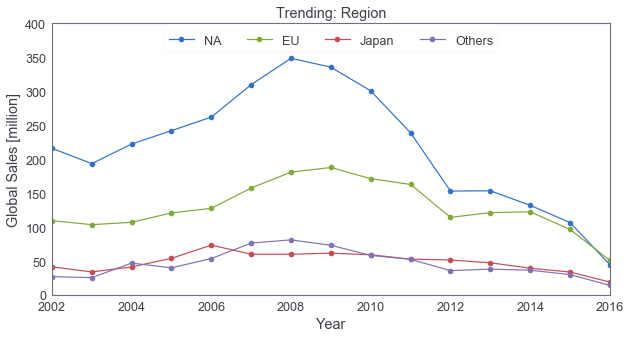

In [426]:
regions = ['NA', 'EU', 'Japan', 'Others']
df_region = df[['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']].groupby(['Year_of_Release'])\
    .sum().reset_index()
years = df_region['Year_of_Release'].values
plt.figure(figsize=(10,5))
for i in range(4):
    plt.plot(years, df_region[df_region.columns[i+1]].values, 'o-', label=regions[i])
plt.grid(False)
plt.title('Trending: Region')
plt.xlim([2002,2016])
plt.ylim([0,400])
plt.xlabel('Year')
plt.ylabel('Global Sales [million]')
plt.xticks(range(2002,2017,2),range(2002,2017,2))
plt.legend(loc=9, ncol=4)
plt.savefig('../plot/final_sales_region_year.pdf', bbox_inches='tight')